# Importing Data into a Pandas DataFrame

In [1]:
# Add Matplotlib inline magic command
%matplotlib inline

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import os

In [2]:
# Files to load
city_data_to_load = os.path.join("Resources", "city_data.csv")
ride_data_to_load = os.path.join("Resources", "ride_data.csv")

In [3]:
# Read city data file and store it in a Pandas DF
city_data_df = pd.read_csv(city_data_to_load)
city_data_df.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [4]:
# Read ride data file and store it in a Pandas DF
ride_data_df = pd.read_csv(ride_data_to_load)
ride_data_df.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344


# Data Cleaning: City Data df


In [5]:
# Get the columns and the rows
city_data_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [6]:
# Get the columns and the rows that are not null
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [7]:
# Get the data types of each column
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [9]:
# Find out how many unique data points there are for each type of city
city_data_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [10]:
# Get the number of data points from the Urban cities
sum(city_data_df["type"]=="Urban")

66

In [11]:
# Get the number of data points from the Rural cities
sum(city_data_df["type"]=="Rural")

18

In [12]:
# Get the number of data points from the Rural cities
sum(city_data_df["type"]=="Rural")

18

# Data Cleaning: Ride Data df

In [13]:
# Get the columns and the rows
ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [14]:
# Get the columns and the rows that are not null
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [15]:
# Get the data types of each column
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

# Merge dfs

In [16]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


# Create BUBBLE CHART 
-av fare vs total # of rides
-bubble size- total number of drivers for each type (urb, suburb, rur)

In [19]:
# Create the Urban Cities DF, Suburban Cities DF, and Rural Cities DF
urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]
suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]
rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]

urban_cities_df.head()
suburban_cities_df.head()
rural_cities_df.head()

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,North Holly,2019-02-02 14:54:00,12.42,1985256326182,8,Rural
2252,Michaelberg,2019-03-27 18:27:34,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2019-02-23 21:12:24,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,2019-05-06 08:57:56,51.80,4018025271936,2,Rural


In [30]:
# Get the number of rides for Urban Cities, Suburban Cities, and Rural Cities
urban_ride_count = urban_cities_df.groupby(["city"]).count()["ride_id"]
suburban_ride_count = suburban_cities_df.groupby(["city"]).count()["ride_id"]
rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"]

urban_ride_count
suburban_ride_count
rural_ride_count

city
Bradshawfurt         10
Garzaport             3
Harringtonfort        6
Jessicaport           6
Lake Jamie            6
Lake Latoyabury      11
Michaelberg          12
New Ryantown          6
Newtonview            4
North Holly           9
North Jaime           8
Penaborough           5
Randallchester        5
South Jennifer        7
South Marychester     8
South Saramouth       4
Taylorhaven           6
West Heather          9
Name: ride_id, dtype: int64

In [31]:
# Get the average fare for each city in Urban Cities, Suburban Cities, and Rural Cities
urban_avg_fare = urban_cities_df.groupby(["city"]).mean()["fare"]
suburban_avg_fare = suburban_cities_df.groupby(["city"]).mean()["fare"]
rural_avg_fare = rural_cities_df.groupby(["city"]).mean()["fare"]

urban_avg_fare

city
Amandaburgh            24.641667
Barajasview            25.332273
Carriemouth            28.314444
Christopherfurt        24.501852
Deanville              25.842632
                         ...    
West Patrickchester    28.233125
West Robert            25.123871
West Samuelburgh       21.767600
Williamsstad           24.362174
Williamsview           26.599000
Name: fare, Length: 66, dtype: float64

In [29]:
# Get the average number of drivers for each Urban City, Suburban City, and Rural City
urban_driver_count = urban_cities_df.groupby(["city"]).mean()["driver_count"]
suburban_driver_count = suburban_cities_df.groupby(["city"]).mean()["driver_count"]
rural_driver_count = rural_cities_df.groupby(["city"]).mean()["driver_count"]

urban_driver_count
suburban_driver_count
rural_driver_count

city
Bradshawfurt         7.0
Garzaport            7.0
Harringtonfort       4.0
Jessicaport          1.0
Lake Jamie           4.0
Lake Latoyabury      2.0
Michaelberg          6.0
New Ryantown         2.0
Newtonview           1.0
North Holly          8.0
North Jaime          1.0
Penaborough          6.0
Randallchester       9.0
South Jennifer       7.0
South Marychester    1.0
South Saramouth      7.0
Taylorhaven          1.0
West Heather         4.0
Name: driver_count, dtype: float64

# CREATE URBAN CITIES BUBBLE CHART

- x axis: number of rides
- y axis: av fare for each city
- marker size: av number of drivers

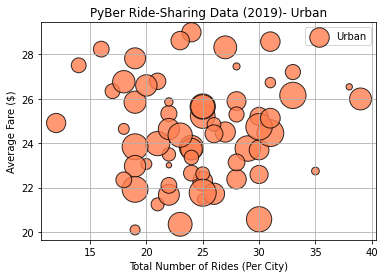

In [37]:
# Build the scatter plots for Urban Cities using the MATLAB method
plt.scatter(urban_ride_count, 
            urban_avg_fare, 
            s=10*urban_driver_count, c="coral",
            edgecolor="black", linewidths=1,
            alpha=0.8, label="Urban")
plt.title("PyBer Ride-Sharing Data (2019)- Urban")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)

# Add the legend
plt.legend()

# Show the plot
plt.show()


# CREATE SUBURBAN CITIES BUBBLE CHART

- x axis: number of rides
- y axis: av fare for each city
- marker size: av number of drivers

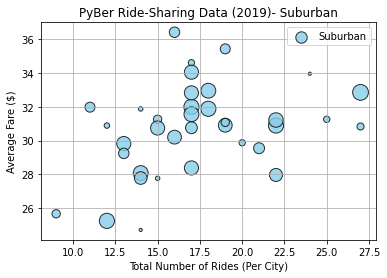

In [38]:
# Build the scatter plots for Suburban Cities using the MATLAB method
plt.scatter(suburban_ride_count, 
            suburban_avg_fare, 
            s=10*suburban_driver_count, c="skyblue", 
            edgecolor="black", linewidths=1, 
            alpha=0.8, label="Suburban")
plt.title("PyBer Ride-Sharing Data (2019)- Suburban")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)

# Add the legend
plt.legend()

# Show the plot
plt.show()

# CREATE SUBURBAN CITIES BUBBLE CHART

- x axis: number of rides
- y axis: av fare for each city
- marker size: av number of drivers

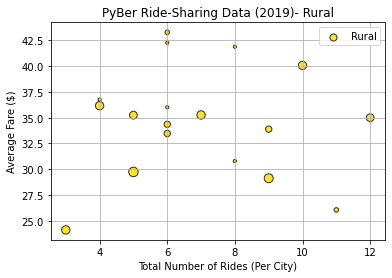

In [39]:
# Build the scatter plot for Rural Cities using the MATLAB method
plt.scatter(rural_ride_count, 
            rural_avg_fare, 
            s=10*rural_driver_count, c="gold", 
            edgecolor="black", linewidths=1,
            alpha=0.8, label="Rural")
plt.title("PyBer Ride-Sharing Data (2019)- Rural")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)

# Add the legend
plt.legend()

# Show the plot
plt.show()

# Create Bubble Chart for av. fare Vs no. of rides w/ bubble size based on the total number of drivers for three city types.

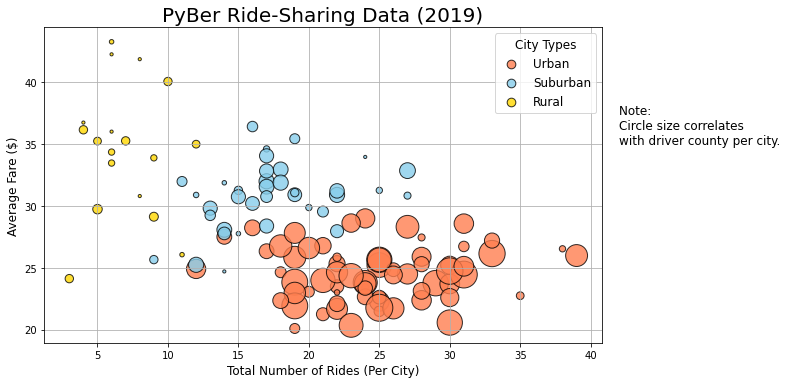

In [46]:
# Add the scatter plots for each city type
plt.subplots(figsize=(10,6))
plt.scatter(urban_ride_count, 
            urban_avg_fare, 
            s=10*urban_driver_count, c="coral",
            edgecolor="black", linewidths=1,
            alpha=0.8, label="Urban")

plt.scatter(suburban_ride_count, 
            suburban_avg_fare, 
            s=10*suburban_driver_count, c="skyblue", 
            edgecolor="black", linewidths=1, 
            alpha=0.8, label="Suburban")

plt.scatter(rural_ride_count, 
            rural_avg_fare, 
            s=10*rural_driver_count, c="gold", 
            edgecolor="black", linewidths=1,
            alpha=0.8, label="Rural")

# Add graph properties
plt.title("PyBer Ride-Sharing Data (2019)", fontsize=20)
plt.ylabel("Average Fare ($)", fontsize=12)
plt.xlabel("Total Number of Rides (Per City)", fontsize=12)
plt.grid(True)

# Create a legend
lgnd = plt.legend(fontsize="12", mode="Expanded",
        scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

# Add text label about circle size
plt.text(42, 35, "Note: \nCircle size correlates\nwith driver county per city.", fontsize="12")

# Save the figure
plt.savefig("Analysis/Fig1.png")
plt.gcf().subplots_adjust(bottom=0.15)

# Show the plot
plt.show()